# STAT 517 Project #1

# ROHIT KUMAR YADAV, Masters in Computer Science
# University of Idaho


## Question 2: Predicting Income >$50k or not

This study focuses on the US Adult Census dataset; a repository of 32,561 entires carefully extracted from 
the 1994 US Census database. We would like to determine if an individual has a salary greater 
than or less than $50,000 annually based on the variables provided. 

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings. 

The data can be retrieved as follows:


In [98]:
#Loading and displaying the data
import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Nominal Attributes
* **workclass**:
    + Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
Without-pay, Never-worked.
* **education**: 
    + Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **marital-status**:
    + Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: 
    + Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: 
    + Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Descriptions of an individual's race
    + White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: 
    + Male, Female
* **native-country**: 
    + United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hongkong, Holand-Netherlands.

### Continuous Attributes
* **age**
* **fnlwgt**
* **education-num**
* **capital-gain**
* **capital-loss**
* **hours-per-week**


# Solution

We will start solving this problem by import python tools for various data operations.
Numpy, Pandas and random for data analysis.
Seaborn and Matplotlib for data visualization.
Various models like logistic regression, support vector machines etc for data modelling.

In [99]:
#importing data analysis packages
import numpy as np
import pandas as pd
import random as rnd

#importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Dataset columns

In [100]:
#Printing the column values
print (adult.columns.values)
print ("-----------************************************************--------------------------")
#Analysing the data 
print (adult.describe(include=['O']))

['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country' 'salary']
-----------************************************************--------------------------
       workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  salary  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720  


Below I have chosen salary attribute from the dataset and arrange it in decending order according to their age.

In [101]:
#Sorting the salary in decending order according to theie age.
adult[['age', 'salary']].sort_values(by='salary', ascending = False)

,age,salary
32560,52,>50K
25061,49,>50K
9827,51,>50K
9828,64,>50K
25072,53,>50K
25069,47,>50K
9837,29,>50K
25065,37,>50K
25063,47,>50K
9842,46,>50K


# Data Modelling

In [102]:
#Modelling of the data
import seaborn as sns
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Representing the data 

pairplot is used to represent in the given dataset on the basis of salary to view the data effectively and analyze the dependence of various attributes over the target attribute.

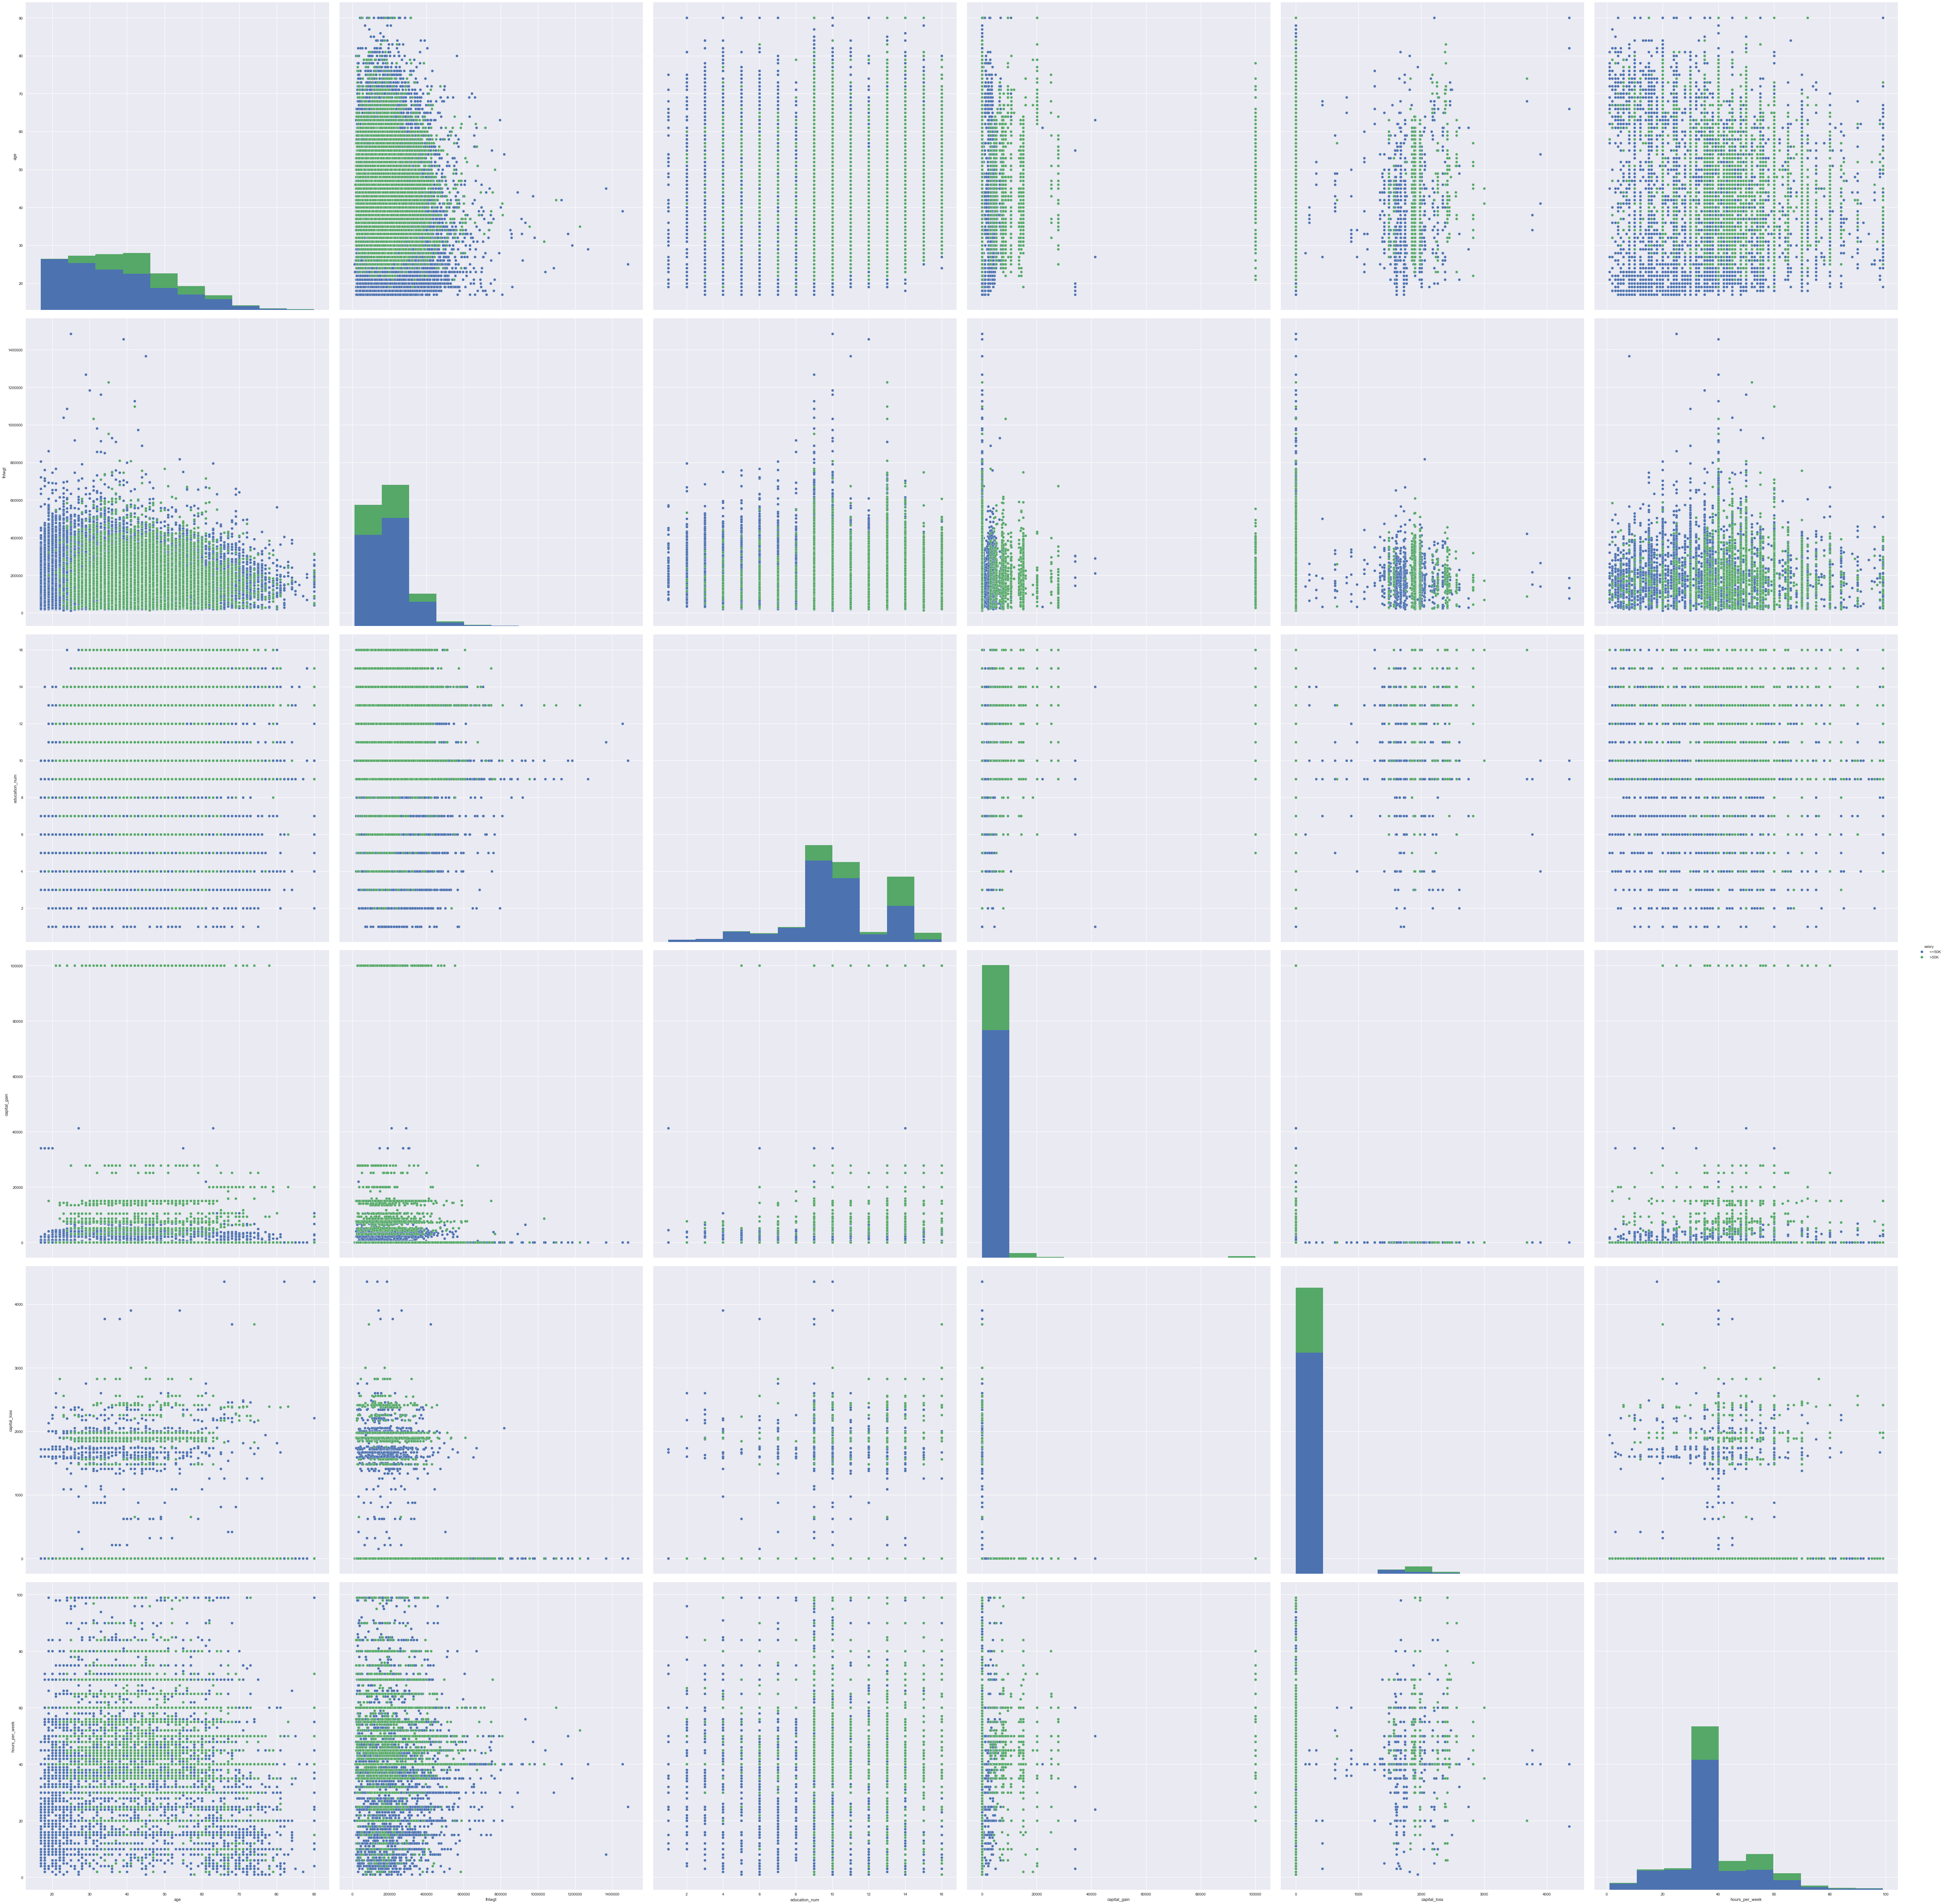

In [103]:
#pairplot is used to represent on the available data on the basis of salary whether >50K or <=50K
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(adult,hue = 'salary', size = 11.5)

# Target variable: SALARY

"SALARY" is the target variable in the given dataset.
In below code we are just checking how many person having Salary <=50K or Salary >50K

In [104]:
#checking the target variables having salary <=50K >50K
adult.salary.value_counts().sort_index()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

# Cleaning of the Dataset

Data Cleansing is a step by step process of detecting anomalies in a given set of data. These anomalies can be in any form i.e. incorrect entries in different subsets of the given data-set, so this step is very important before modelling for error free result, In the below steps I checked null entries, misplaced data etc

In [105]:

for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']:
    print (value,":", sum(adult[value] == ' ?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
salary : 0


In [106]:
#we found the defected attributes are workclass, occupation and native country
defected_columns = ['workclass', 'occupation', 'native_country']
for col in defected_columns:
    adult[col] = (adult[col].replace(to_replace=' ?', value=np.nan))
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [107]:
#Checking whether any attribute has null value or not.
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
salary               0
dtype: int64

# Pandas DataFrame

2 Pandas DataFrame we have to make : x_adult and y_adult in which the 
x_adult consists of all the continuous columns from the given dataset. for instance
The continuous columns given are: age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
target column is: "SALARY".

In [108]:
import pandas as pd
x_adult = pd.DataFrame([adult.age, adult.fnlwgt, adult.education_num, adult.capital_gain, adult.capital_loss, adult.hours_per_week]).T
y_adult = pd.DataFrame([adult.salary]).T
print (x_adult.shape)
print (y_adult.shape)

(32561, 6)
(32561, 1)


# Training and Testing Datasets

In [109]:
#we are making 2 separate datasets for modelling the data where xtrain and ytrain are there to train the model in which from the developed model we predicted Y model value for each Xtest

#Finally we test the model by comparing ymodel with ytest values.
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_adult, y_adult, random_state = 2, test_size = 0.7)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(9768, 6)
(22793, 6)
(9768, 1)
(22793, 1)


# K - Nearest Neighbor

In [110]:
#K nearest neighbors classifier for predicting the data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest) #Evaluating the model on the test data set
acc_knn1 = round(model.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest, ymodel) * 100, 3)
print ('Testing accuracy = {}'.format(acc_knn))
#training accuracy is 99.949%.
#The testing accuracy is 71.316%.

Training accuracy = 99.949
Testing accuracy = 71.316


/Users/rohit1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


# Logistic Regression

In [111]:
#Logistic regression for predicting the data.
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_log))
#The training accuracy is  79.924%.
#Testing accuracy is  79.726%.


Training accuracy = 79.924
Testing accuracy = 79.726


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gaussian Naive Bayes Model

In [112]:
#Gaussian Naive Bayes model.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
acc_gauss1 = round(model.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_gauss1)) 
acc_gauss = round(accuracy_score(ytest, ymodel) * 100, 3)
print ('Testing accuracy = {}'.format(acc_gauss))
#The training accuracy is 79.771%.
#The testing accuracy is 79.375%.

Training accuracy = 79.771
Testing accuracy = 79.375


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Stochastic Gradient Descent

In [113]:
#Stochastic gradient descent model.
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_sgd1))
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_sgd))
#The training accuracy is 78.624%.
#The testing accuracy is 78.138%.

Training accuracy = 79.382
Testing accuracy = 79.143


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Machine

In [114]:
#Support vector machines.
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_svc1))
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_svc))
#The training accuracy is 99.672%.
#Testing accuracy is around 75.764%.

/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 99.672
Testing accuracy = 75.764


# Random Forest

In [115]:
#Random Forest
forest = RandomForestClassifier(n_estimators = 200, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_random_forest))
#The training accuracy is 99.949%.
#Testing accuracy is around 81.398%.

/Users/rohit1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 99.949
Testing accuracy = 81.398


# Decision Tree

In [116]:
#Decision tree.
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_decision_tree))
#The training score is reported 99.949%
#The accuracy is around 77.05%.

Training accuracy = 99.949
Testing accuracy = 76.831


# Summarizing Results

In [132]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic regression','Gaussian Naive Bayes','Stochastic Gradient Decent','SVM','Random Forest', 'Decision Tree'],
    'Training Score': [acc_knn1,acc_log1,acc_gauss1,acc_sgd1, acc_svc1,acc_random_forest1, acc_decision_tree1],
    'Testing Score': [acc_knn,acc_log,acc_gauss,acc_sgd, acc_svc,acc_random_forest, acc_decision_tree]})
models

,Model,Training Score,Testing Score
0,KNN,99.949,71.316
1,Logistic regression,79.924,79.726
2,Gaussian Naive Bayes,79.771,79.375
3,Stochastic Gradient Decent,79.382,79.143
4,SVM,99.672,75.764
5,Random Forest,99.949,81.398
6,Decision Tree,99.949,76.831


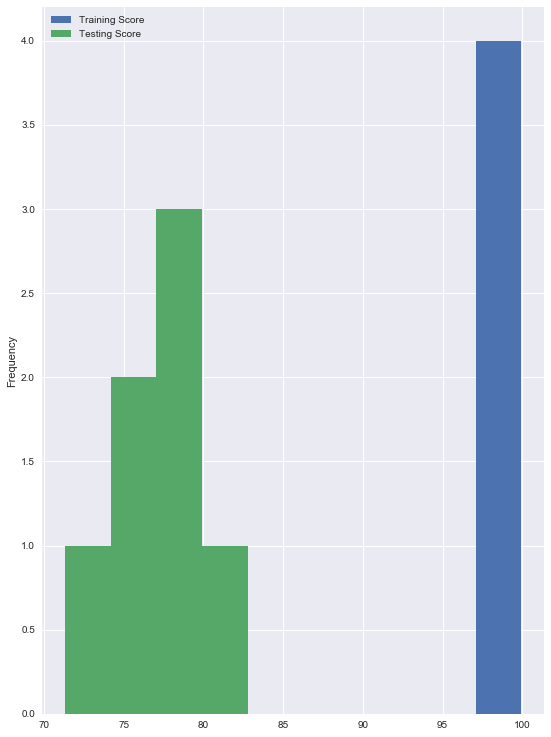

In [133]:
models.plot(kind = 'hist', figsize = (9, 13))

## Question 3: Purchasing Insurance

In [135]:
import pandas as pd
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No
5,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,No
6,10,1,4,3,3,1,4,1,4,7,...,0,0,0,0,0,0,0,0,0,No
7,9,1,3,3,3,1,3,2,4,7,...,0,0,0,1,0,0,0,0,0,No
8,33,1,2,3,8,1,4,1,4,6,...,0,0,0,0,0,0,0,0,0,No
9,41,1,3,3,10,0,5,0,4,7,...,0,0,0,0,0,0,0,0,0,No


In [136]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0
5,12,1,4,2,3,0,4,0,5,9,...,0,0,0,0,0,0,0,0,0,0
6,38,1,3,2,9,0,4,0,5,9,...,0,0,0,0,1,0,0,0,0,0
7,3,1,2,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
8,8,1,3,3,2,1,7,0,1,6,...,0,0,0,0,1,0,0,0,0,0
9,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,1,0,0,0,0,0


The data above contains 4630 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy. 

Based on a direct marketing problem, the goal is to $predict$ and $interpret$ caravan insurance policy ownership on the basis of product usage and sociodemographic data supplied about the customer.

Consider using all prediction models you learned for the prediction task, suppose your supervisor has limited time and resources to only approach 50 customers.
You are asked to recommend to your supervisor a subset of 50 customers from these 1064 customers in the Caravan_unk file who would most likely buy a caravan policy.
Report **just the row numbers** of your selected 50 customers as they appear in the Caravan_unk file in increasing order (say, row #4, 7, 11, 59, 113, ...), then explain how you come up with this selected subset and your entire modeling process. 

# SOLUTION

# Columns and shape of given dataset

In [138]:
#Viewing the column names and shape.
print (Caravan_train.columns)
print (Caravan_train.shape)

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

# Training and Testing Datasets

We identify the target and non-target attributes in our dataset.
'Purchase' is the target attribute (y_caravan) while all the other attributes are non-target (x_caravan).
Further we split the whole dataset into training (xtrain and ytrain) and testing (xtest and ytest).
We split 75% and 25% between training and testing datasets.

In [140]:
import pandas as pd
x_caravan = pd.DataFrame(Caravan_train).T
x_caravan = x_caravan.drop(['Purchase'])
x_caravan = x_caravan.T
print (x_caravan.shape)
y_caravan = pd.DataFrame([Caravan_train.Purchase]).T
print (y_caravan.shape)
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_caravan, y_caravan, random_state = 1, test_size = 0.25)
#Viewing the shapes and column values.
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)
print (xtrain.columns.values)
print (ytrain.columns.values)

(4630, 85)
(4630, 1)
(3472, 85)
(3472, 1)
(1158, 85)
(1158, 1)
['MOSTYPE' 'MAANTHUI' 'MGEMOMV' 'MGEMLEEF' 'MOSHOOFD' 'MGODRK' 'MGODPR'
 'MGODOV' 'MGODGE' 'MRELGE' 'MRELSA' 'MRELOV' 'MFALLEEN' 'MFGEKIND'
 'MFWEKIND' 'MOPLHOOG' 'MOPLMIDD' 'MOPLLAAG' 'MBERHOOG' 'MBERZELF'
 'MBERBOER' 'MBERMIDD' 'MBERARBG' 'MBERARBO' 'MSKA' 'MSKB1' 'MSKB2' 'MSKC'
 'MSKD' 'MHHUUR' 'MHKOOP' 'MAUT1' 'MAUT2' 'MAUT0' 'MZFONDS' 'MZPART'
 'MINKM30' 'MINK3045' 'MINK4575' 'MINK7512' 'MINK123M' 'MINKGEM'
 'MKOOPKLA' 'PWAPART' 'PWABEDR' 'PWALAND' 'PPERSAUT' 'PBESAUT' 'PMOTSCO'
 'PVRAAUT' 'PAANHANG' 'PTRACTOR' 'PWERKT' 'PBROM' 'PLEVEN' 'PPERSONG'
 'PGEZONG' 'PWAOREG' 'PBRAND' 'PZEILPL' 'PPLEZIER' 'PFIETS' 'PINBOED'
 'PBYSTAND' 'AWAPART' 'AWABEDR' 'AWALAND' 'APERSAUT' 'ABESAUT' 'AMOTSCO'
 'AVRAAUT' 'AAANHANG' 'ATRACTOR' 'AWERKT' 'ABROM' 'ALEVEN' 'APERSONG'
 'AGEZONG' 'AWAOREG' 'ABRAND' 'AZEILPL' 'APLEZIER' 'AFIETS' 'AINBOED'
 'ABYSTAND']
['Purchase']


# Importing Data Modelling Tools 

In [141]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Analyzing Data.

In our dataset there are various attributes upon which the target attribute depends in which I am showing histogram for a few attributes and their relation with our target attribute i.e. purchase = yes or purchase = no.

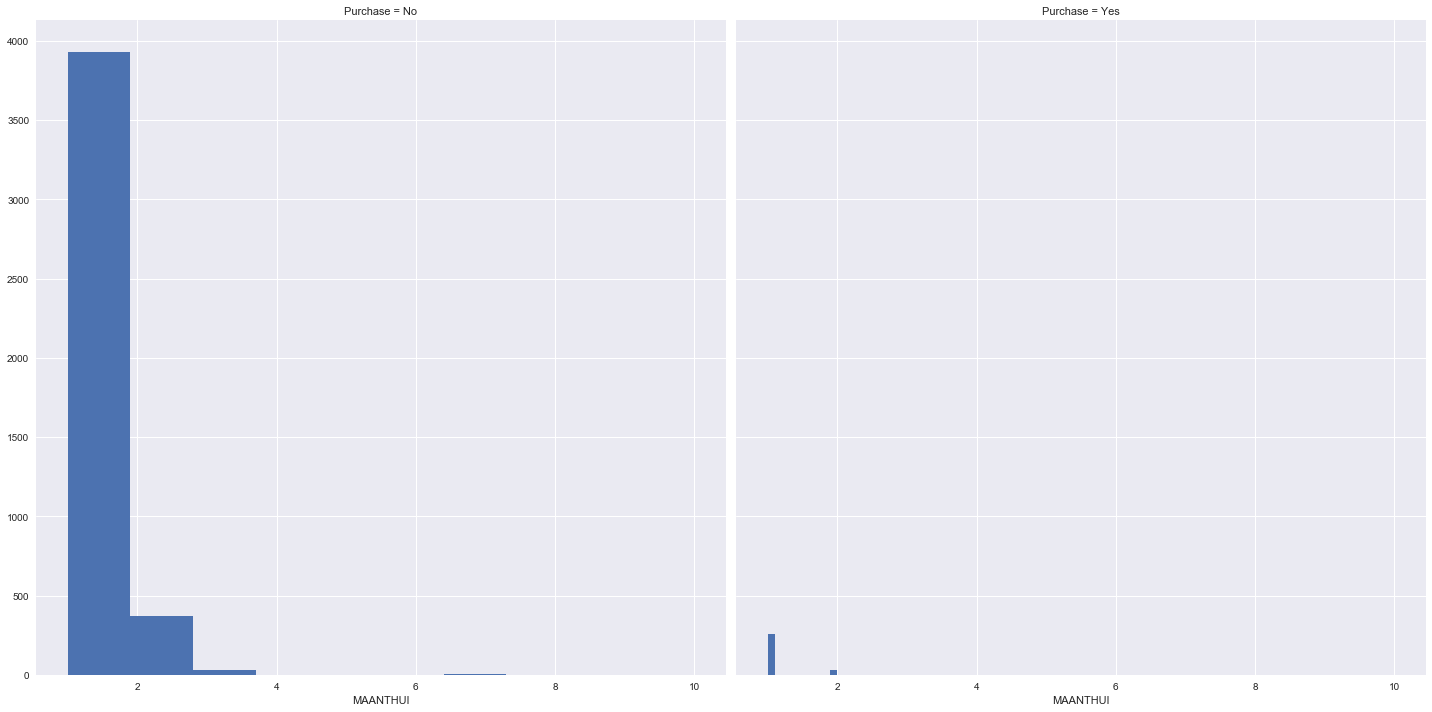

In [152]:
g = sns.FacetGrid(Caravan_train, col='Purchase', size = 10)
g.map(plt.hist, 'MAANTHUI', bins=10)

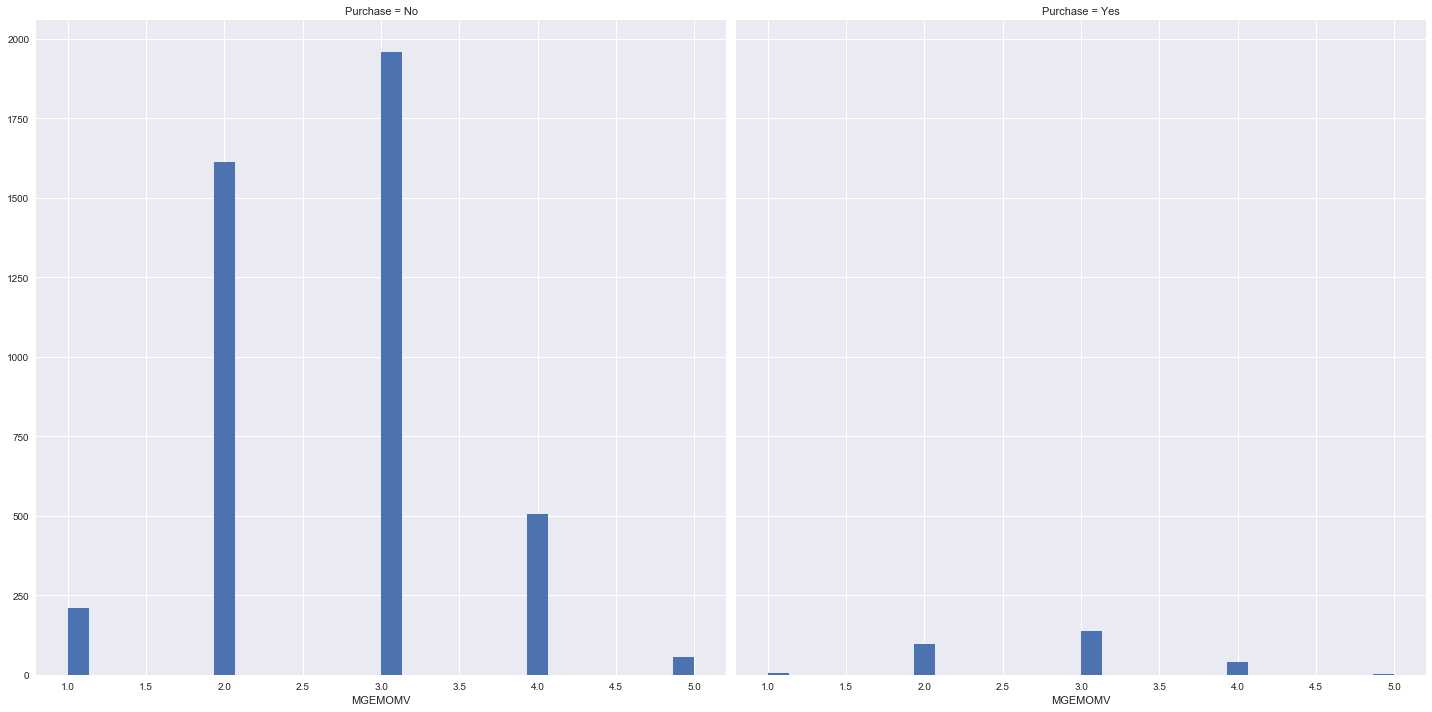

In [153]:
g = sns.FacetGrid(Caravan_train, col='Purchase', size = 10)
g.map(plt.hist, 'MGEMOMV', bins=30)

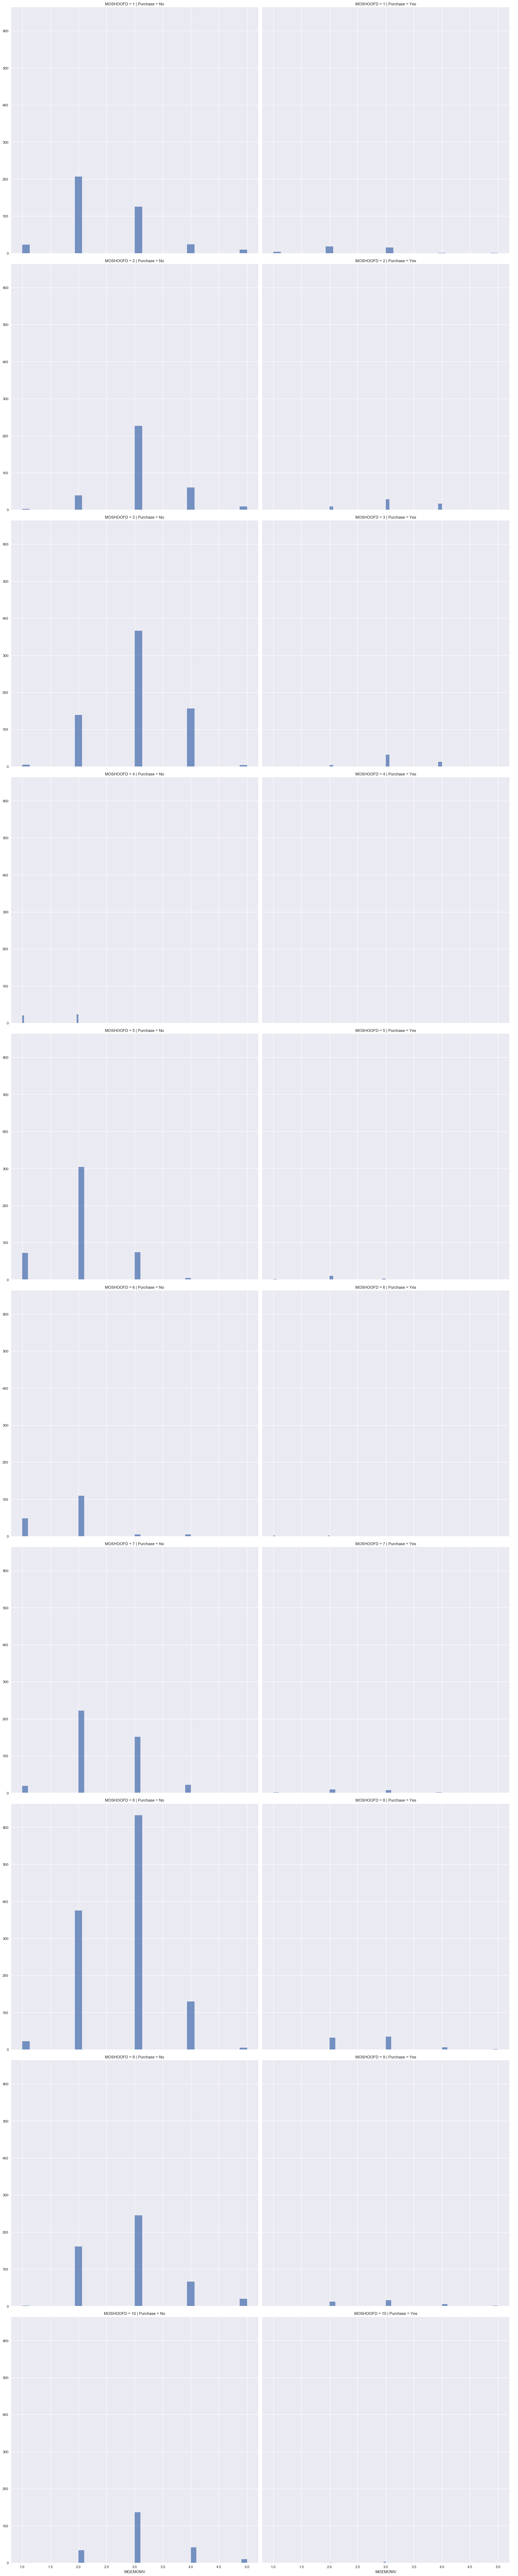

In [154]:
grid = sns.FacetGrid(Caravan_train, col='Purchase', row='MOSHOOFD', size=10, aspect=1.0)
grid.map(plt.hist, 'MGEMOMV', alpha=.75, bins=30)
grid.add_legend();

/Users/rohit1/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


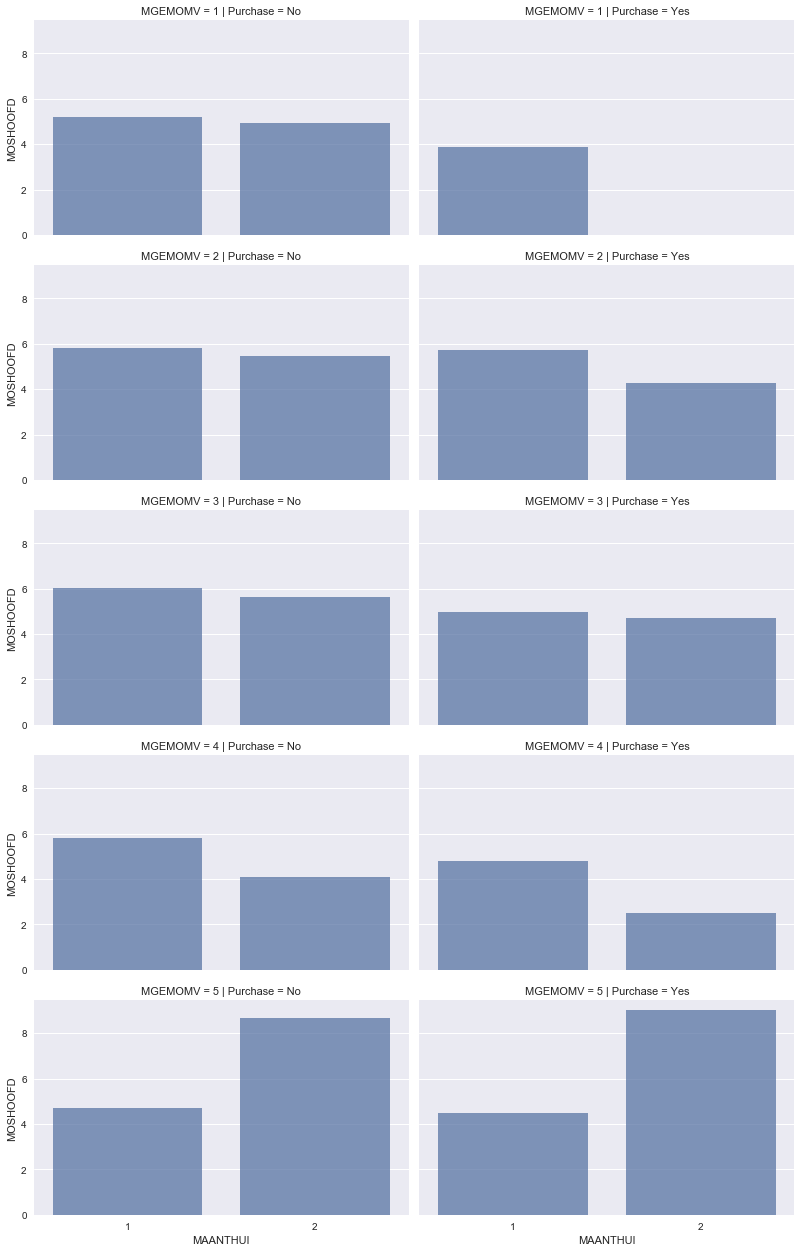

In [155]:
grid = sns.FacetGrid(Caravan_train, row='MGEMOMV', col='Purchase', size=3.5, aspect=1.6)
grid.map(sns.barplot, 'MAANTHUI', 'MOSHOOFD', alpha=.75, ci=None)
grid.add_legend()

# Logistic Regression

In [157]:
#LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_log))

Training accuracy = 94.153
Testing accuracy = 92.919


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Correlation

here we are calculating the correlation of various non-target attributes on the target attribute.
Higher the correlation value, higher is the chances for purchase to increase/decrease.

In [158]:
coeff_df = pd.DataFrame(Caravan_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
81,AFIETS,0.863580
61,PINBOED,0.705150
75,APERSONG,0.659251
60,PFIETS,0.378963
50,PTRACTOR,0.357985
84,Purchase,0.352054
69,AVRAAUT,0.300056
31,MAUT2,0.296547
56,PWAOREG,0.246598
46,PBESAUT,0.245538


# K-NEAREST NEIGHBOR

In [165]:
#K-NEAREST NEIGHBOR
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
acc_knn1 = round(knn.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_knn))

/Users/rohit1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 99.28
Testing accuracy = 89.119


# STOCHASTIC GRADIENT DESCENT

In [166]:
#STOCHASTIC GRADIENT DESCENT
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_sgd1))
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_sgd))

Training accuracy = 94.067
Testing accuracy = 93.178


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SUPPORT VECTOR MACHINES

In [167]:
#SUPPORT VECTOR MACHINES
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
acc_svc1 = round(svc.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_svc1))
acc_svc = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_svc))

/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.268
Testing accuracy = 93.092


# Random Forest

In [168]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
acc_random_forest1 = round(forest.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))

/Users/rohit1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy = 99.31
Testing accuracy = 92.06


# Perceptron

In [169]:
#PERCEPTRON
perceptron = Perceptron()
perceptron.fit(xtrain, ytrain)
y_pred = perceptron.predict(xtest)
acc_perceptron1 = round(perceptron.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_perceptron1))
acc_perceptron = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_perceptron))

Training accuracy = 94.067
Testing accuracy = 93.178


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

In [170]:
#DECISION TREE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 3)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 3)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 99.309
Testing accuracy = 87.91


# Summarizing Results

Now framing the various models used in the modelling process according to its training and testing accuracy and reporting the results in a tabulated form.

In [173]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Stochastic Gradient Decent','Support Vector Machines','Random Forest', 'Perceptron', 'Decision Tree'],
    'Training Score': [acc_log1, acc_knn1, acc_sgd1,acc_svc1, acc_random_forest1,acc_perceptron1, acc_decision_tree1],
    'Testing Score': [acc_log, acc_knn, acc_sgd,acc_svc, acc_random_forest,acc_perceptron, acc_decision_tree]})
models

,Model,Training Score,Testing Score
0,Logistic Regression,94.153,92.919
1,KNN,99.280,89.119
2,Stochastic Gradient Decent,94.067,93.178
3,Support Vector Machines,94.268,93.092
4,Random Forest,99.310,92.060
5,Perceptron,94.067,93.178
6,Decision Tree,99.309,87.910


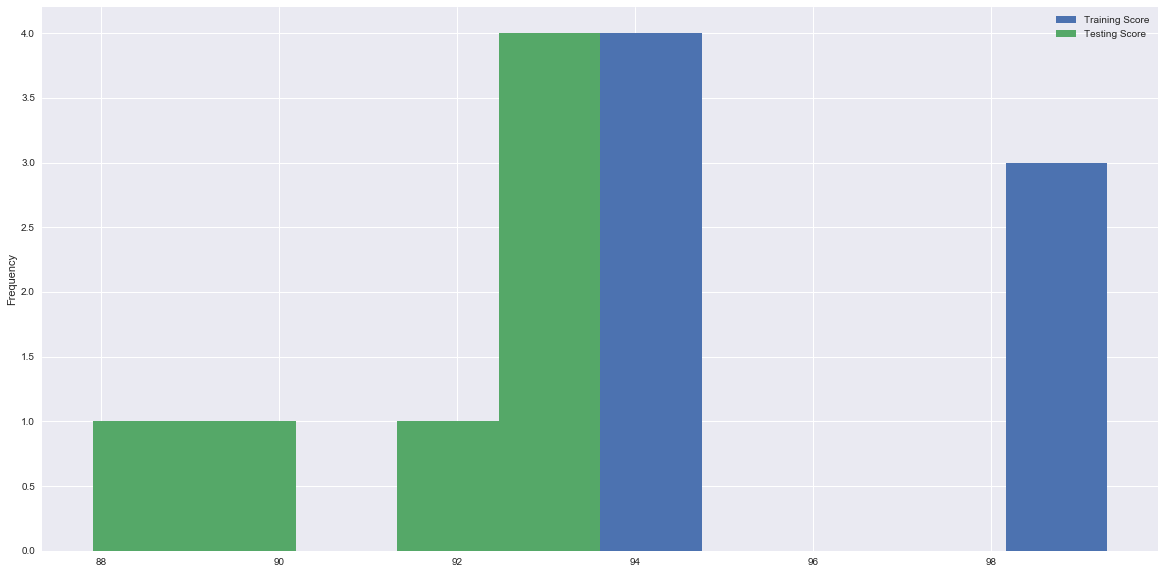

In [177]:
#Plotting of different models on a histogram graph.
models.plot(kind = 'hist', figsize = (20, 10))